# Cluster mapa de calor
Mapas de calor de proximidade: Usando medidas de proximidade entre os pontos, você pode criar mapas de calor que mostram a proximidade entre diferentes pontos e destacam regiões densas ou clusters.

In [23]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn import cluster, datasets

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import seaborn as sns

import scipy.cluster.hierarchy as sch

In [24]:
# Carregar dados do Excel
data = pd.read_excel('dh fractal.xlsx', sheet_name = "Sheet1")

# Selecionar as colunas relevantes - tabela com os valores de neurito CTL
X = data[['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

In [25]:
# Separar os dados de controle e tratamento
data_Control = data[data['grupo'] == 'Control']
data_H2O2 = data[data['grupo'] == 'H2O2']
data_EtOH = data[data['grupo'] == 'EtOH']
data_DHvehicle = data[data['grupo'] == 'DH vehicle']
data_DH2APB = data[data['grupo'] == 'DH 2-APB']

# Selecionar as colunas relevantes para controle
X_Control = data_Control [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_H2O2 = data_H2O2 [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_EtOH = data_EtOH [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_DHvehicle = data_DHvehicle [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_DH2APB = data_DH2APB [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

In [26]:
# Normalizar os dados para controle...
X_Control = StandardScaler().fit_transform(X_Control)

X_H2O2 = StandardScaler().fit_transform(X_H2O2)

X_EtOH = StandardScaler().fit_transform(X_EtOH)

X_DHvehicle = StandardScaler().fit_transform(X_DHvehicle)

X_DH2APB = StandardScaler().fit_transform(X_DH2APB)

# Redução de dimensionalidade com PCA para controle...
pca_Control = PCA(n_components=20)
X_pca_Control = pca_Control.fit_transform(X_Control)

pca_H2O2 = PCA(n_components=20)
X_pca_H2O2 = pca_H2O2.fit_transform(X_H2O2)

pca_EtOH = PCA(n_components=20)
X_pca_EtOH = pca_EtOH.fit_transform(X_EtOH)

pca_DHvehicle = PCA(n_components=20)
X_pca_DHvehicle = pca_DHvehicle.fit_transform(X_DHvehicle)

pca_DH2APB = PCA(n_components=20)
X_pca_DH2APB = pca_DH2APB.fit_transform(X_DH2APB)

# Unir os dados reduzidos de controle e tratamento
X_pca = np.concatenate((X_pca_Control, X_pca_H2O2, X_pca_EtOH, X_pca_DHvehicle, X_pca_DH2APB))

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering (linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)

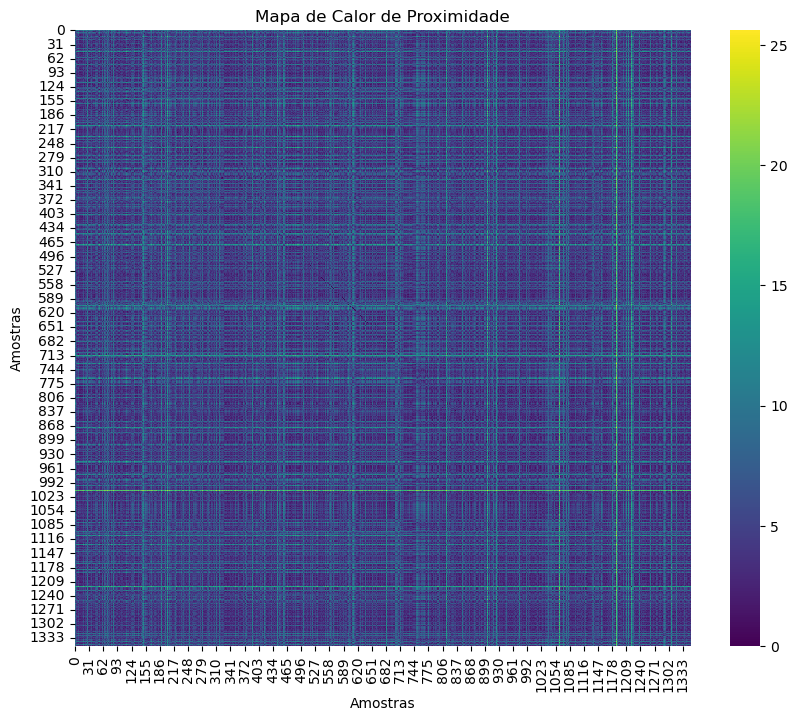

In [32]:
# Calcular a matriz de distância entre os pontos
distance_matrix = sch.distance.pdist(X_pca)

# Converter a matriz de distância em uma matriz de distância quadrada
distance_square_matrix = sch.distance.squareform(distance_matrix)

# Plotar o mapa de calor de proximidade
plt.figure(figsize=(10, 8))
sns.heatmap(distance_square_matrix, cmap='viridis', cbar=True, square=True)
plt.title('Mapa de Calor de Proximidade')
plt.xlabel('Amostras')
plt.ylabel('Amostras')
plt.show()